# 🎓 Student Score Prediction

## 1. Introduction

In [60]:
# Load data, build linear and polynomial regression models, evaluate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
#loading the dataset
df = pd.read_csv(r'C:\Users\g3fr\Desktop\elevvo internship\Task 1\StudentPerformanceFactors.csv')

## 2. Dataset Overview


In [62]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [63]:
#summary about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [64]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [65]:
print(len(df))
print(df.shape)

6607
(6607, 20)


In [66]:
df.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## 3. Data Preprocessing

In [67]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df = df.fillna(df.mode().iloc[0])

In [70]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [71]:
df.sort_values(by = "Exam_Score" , ascending=False).head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
4192,28,90,Low,Medium,Yes,9,91,Medium,Yes,0,Medium,Medium,Public,Positive,2,No,College,Moderate,Female,98


## 4. Exploratory Data Analysis (EDA)

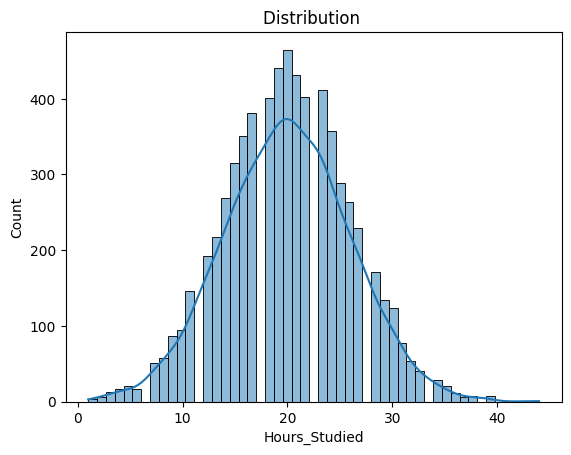

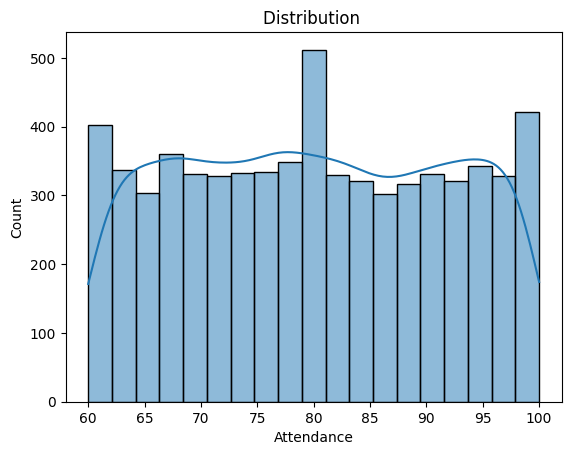

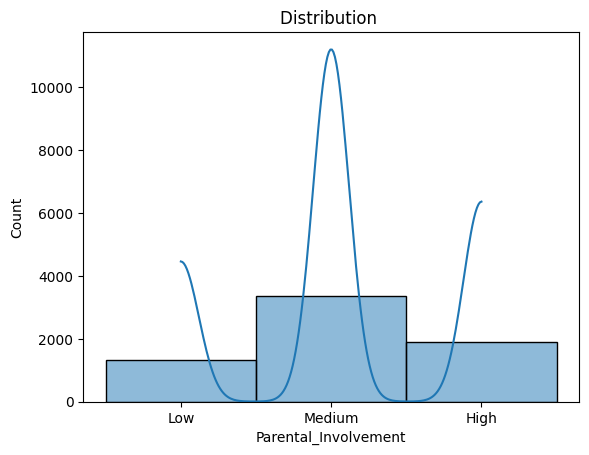

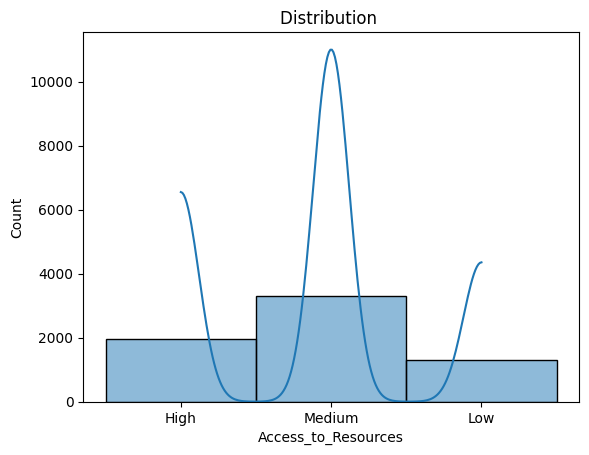

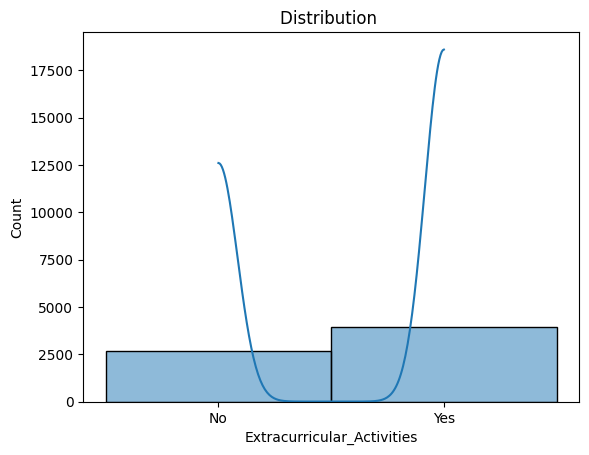

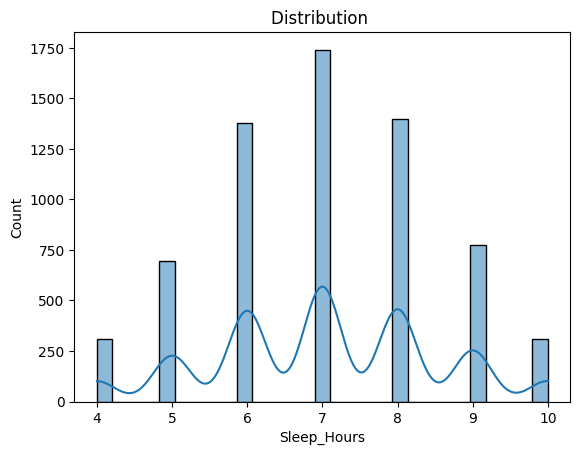

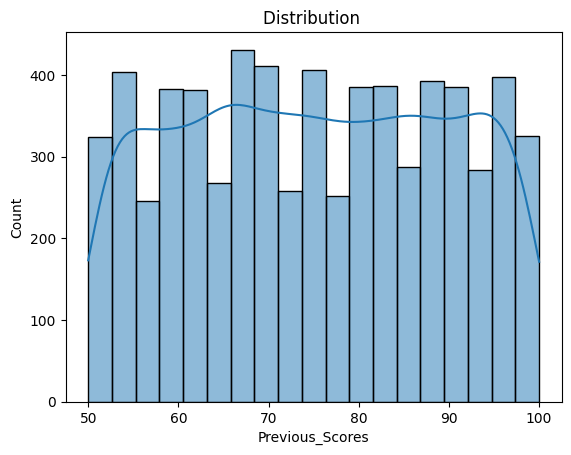

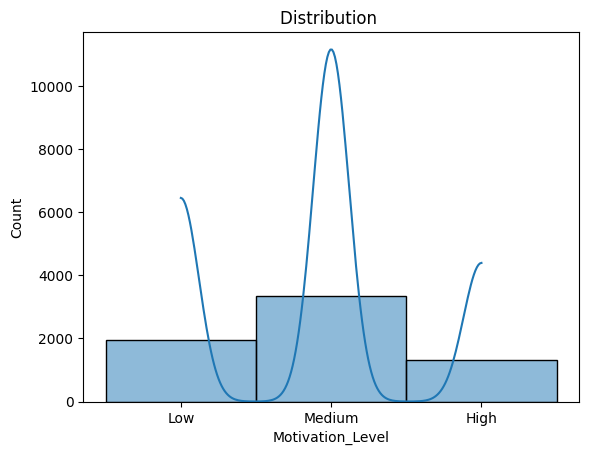

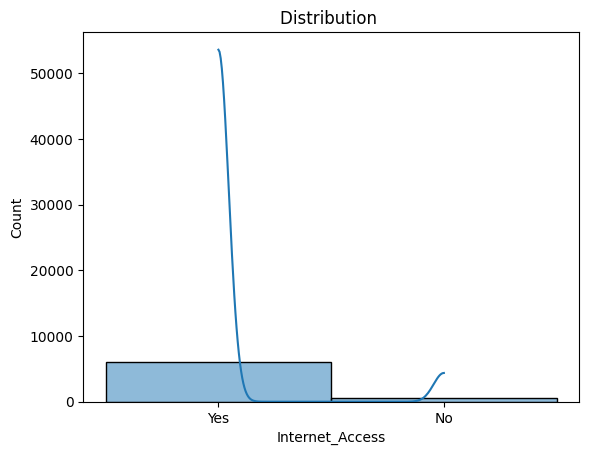

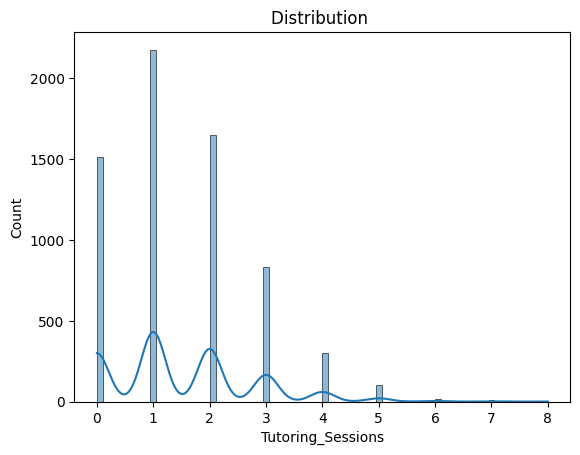

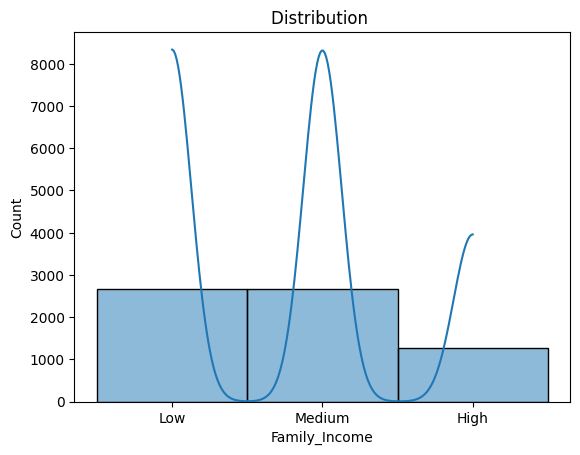

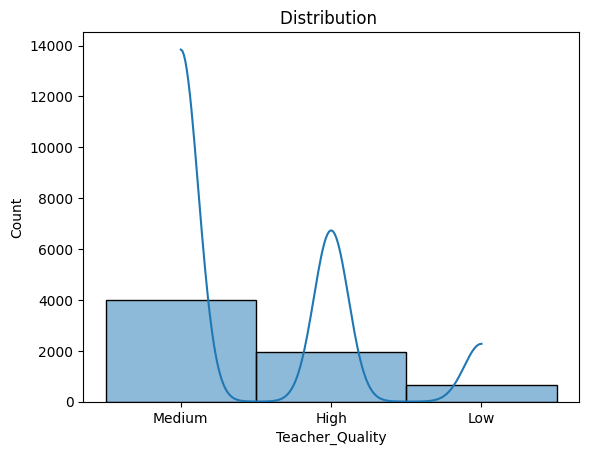

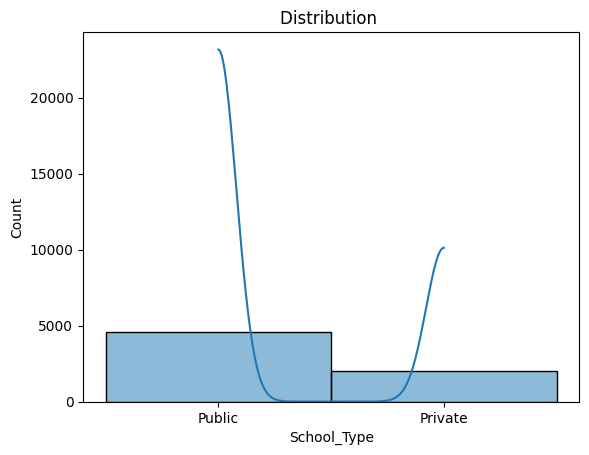

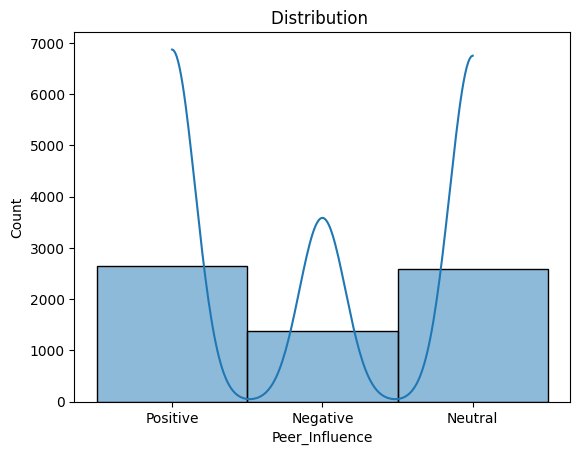

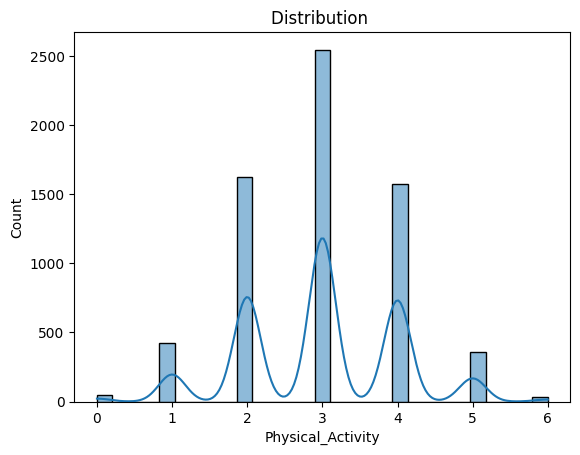

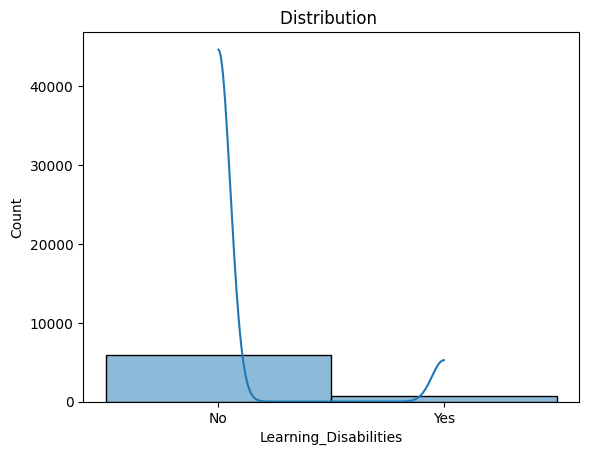

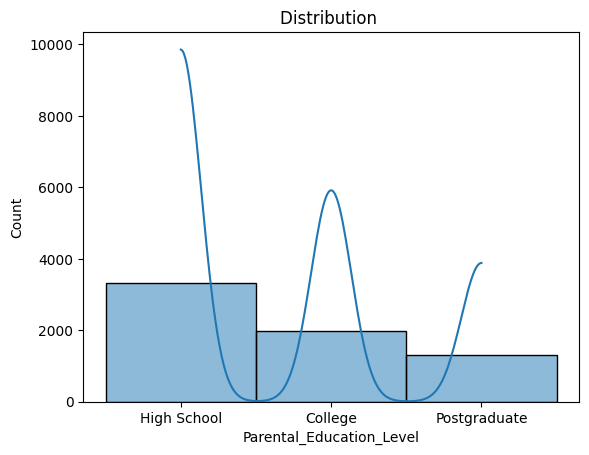

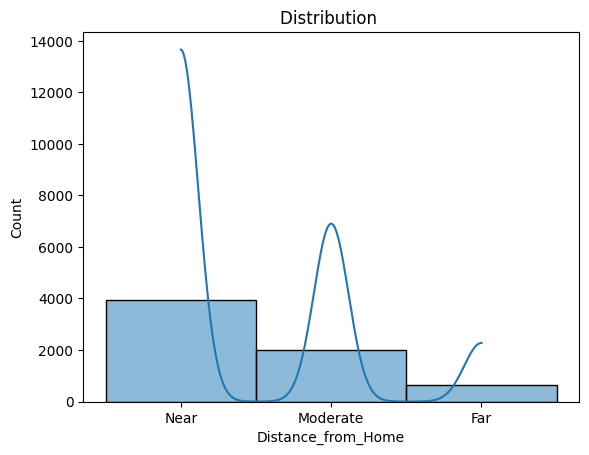

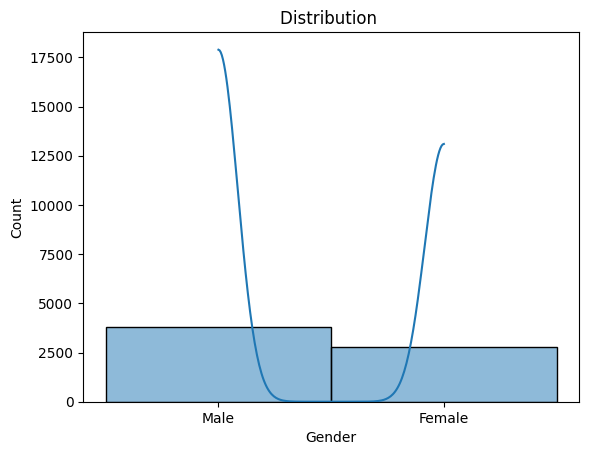

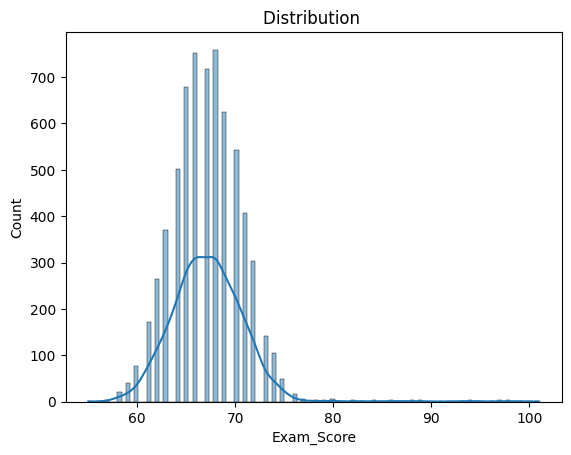

In [72]:
for i in df.columns:
  sns.histplot(df[i], kde=True)
  plt.title('Distribution ')
  plt.show()

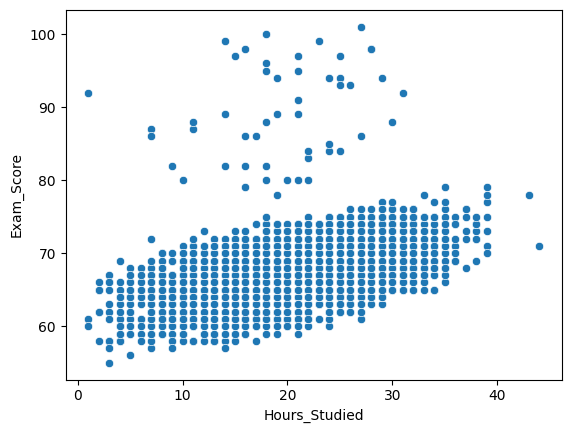

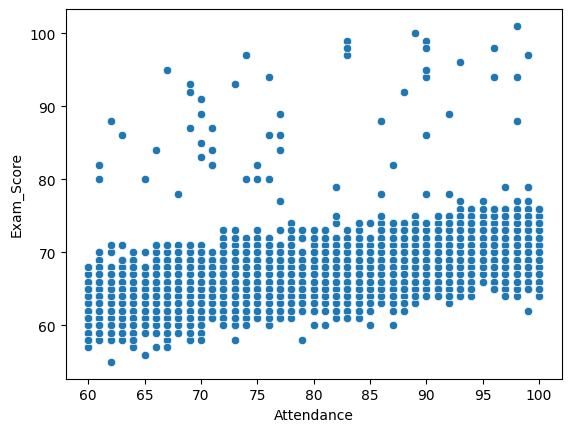

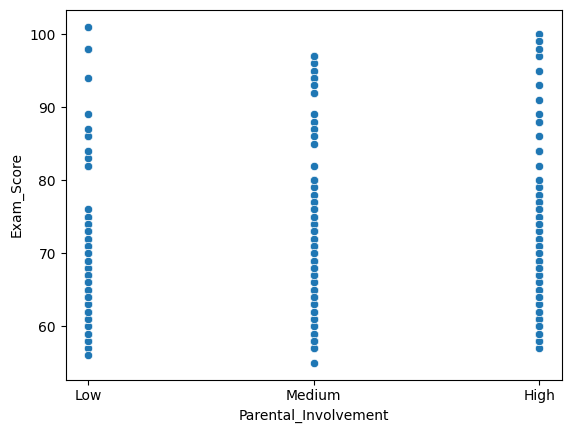

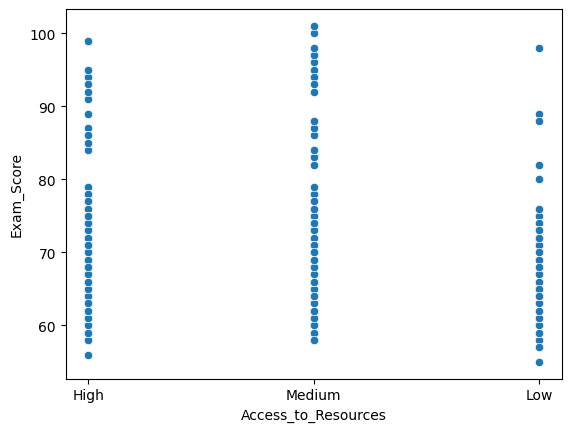

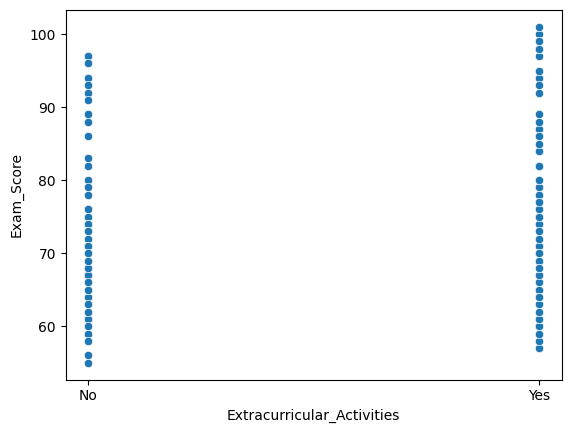

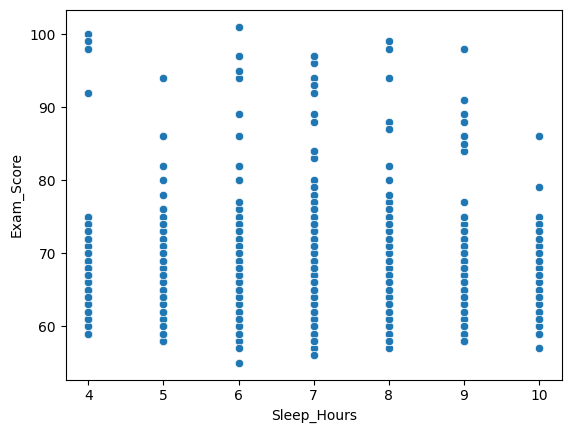

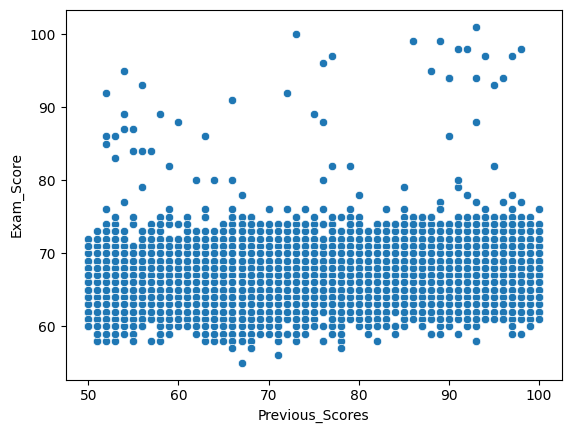

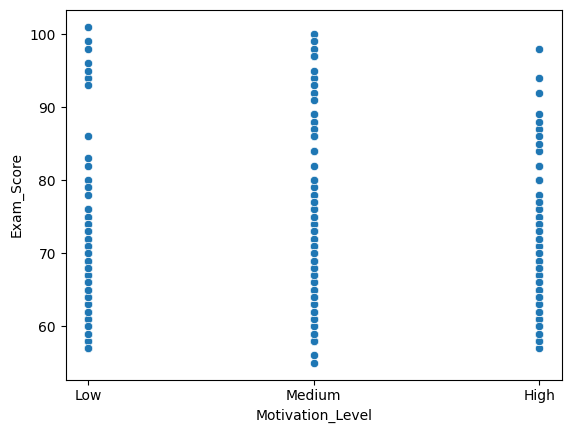

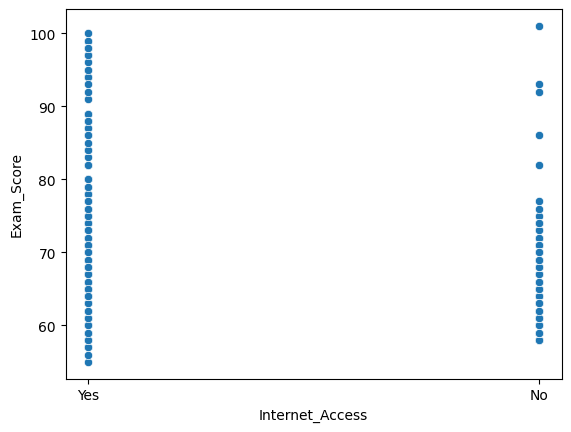

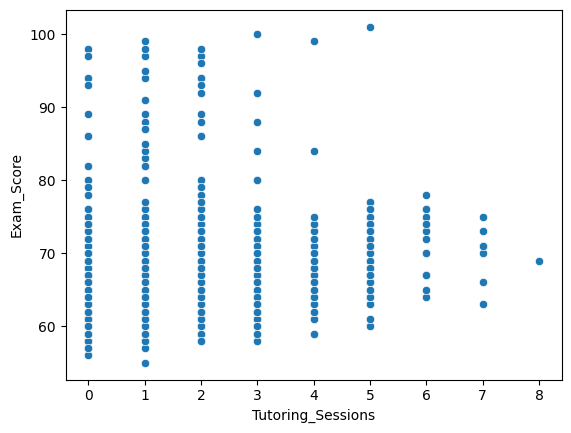

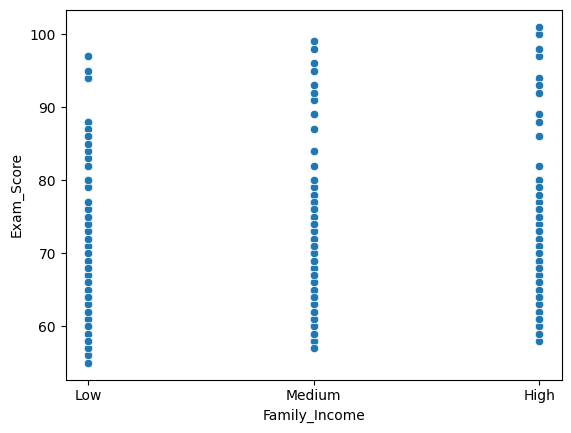

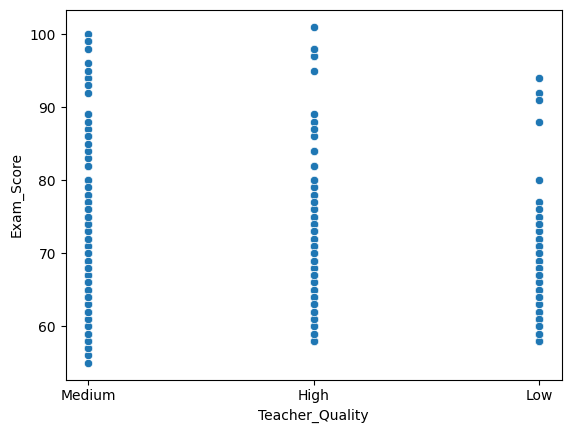

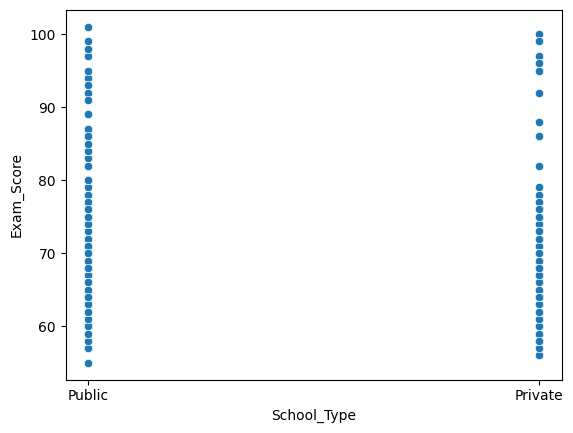

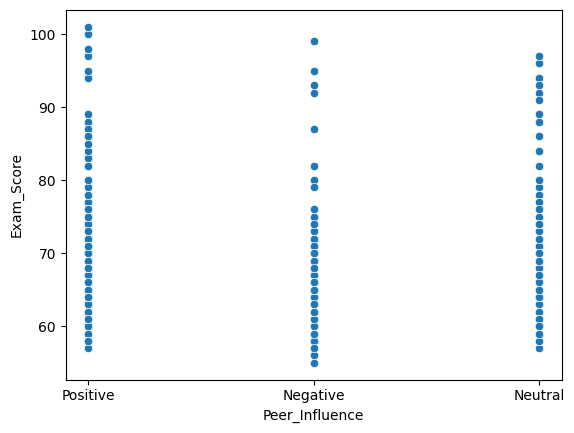

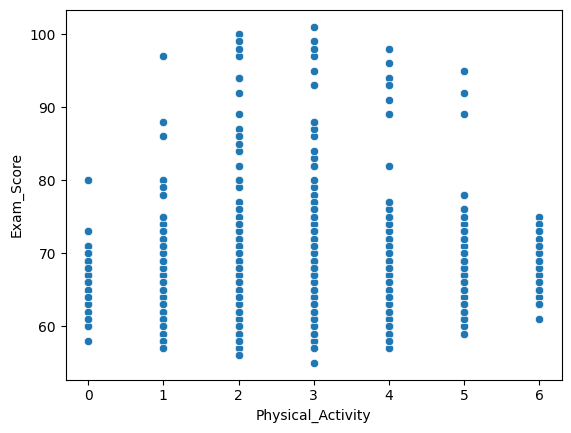

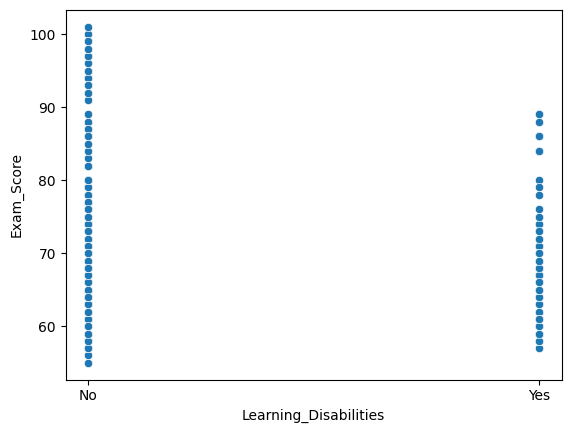

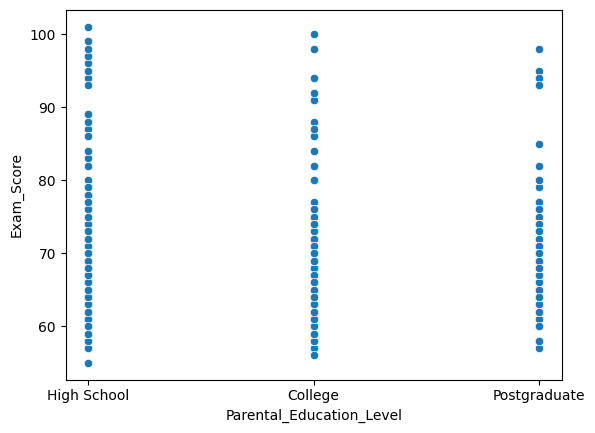

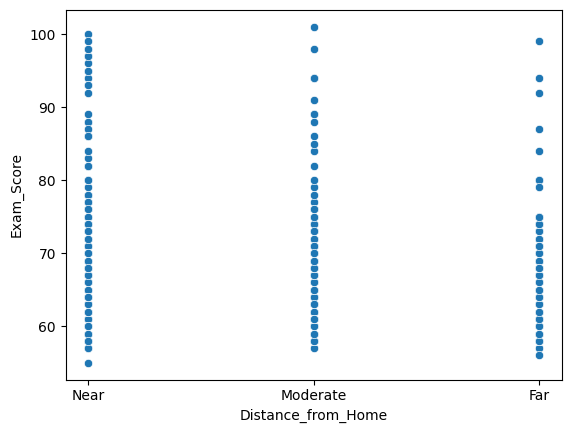

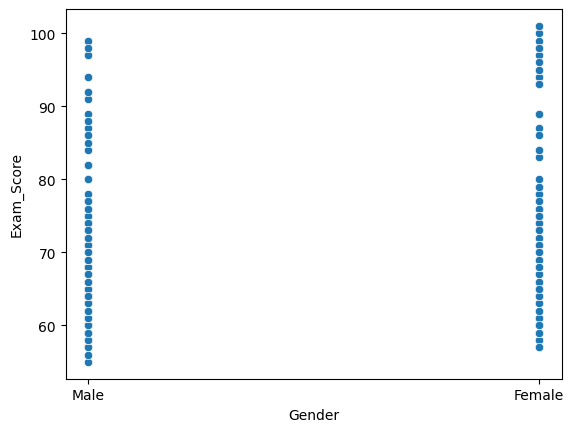

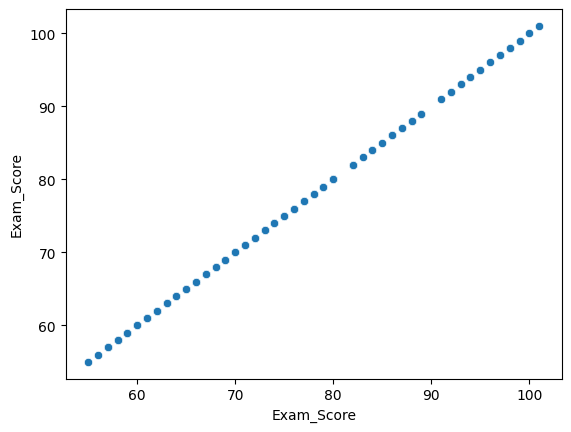

In [73]:
for i in df.columns:
  sns.scatterplot(x=i, y='Exam_Score', data=df)
  plt.show()

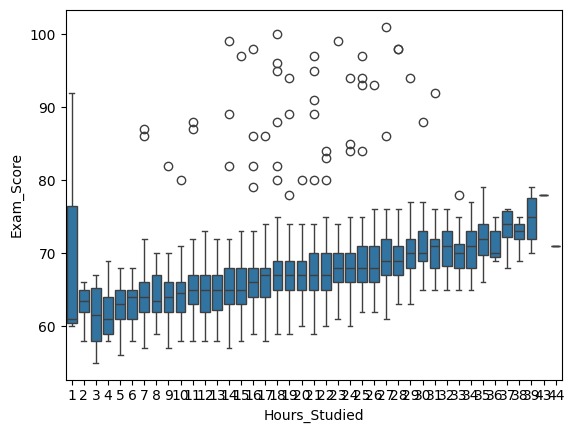

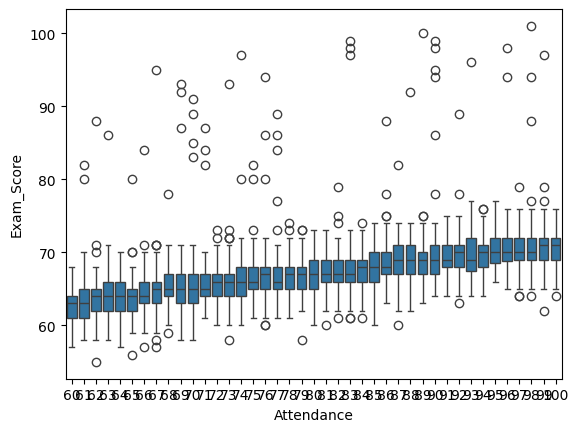

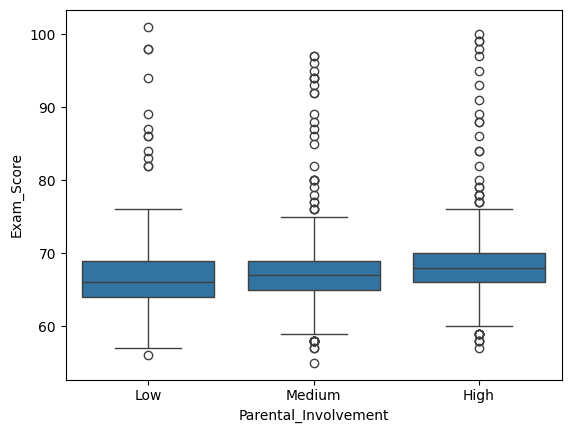

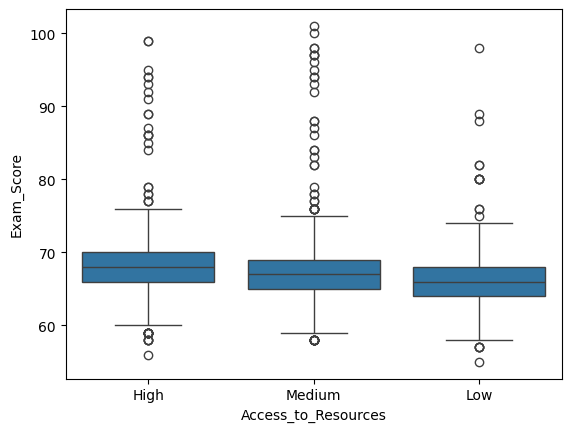

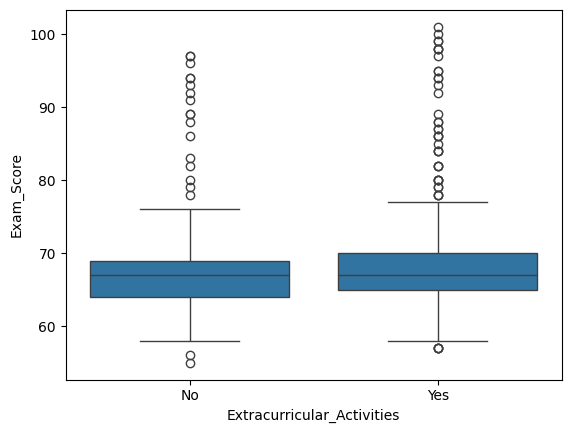

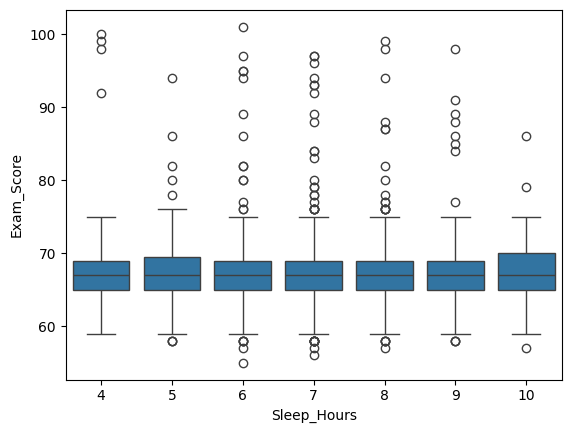

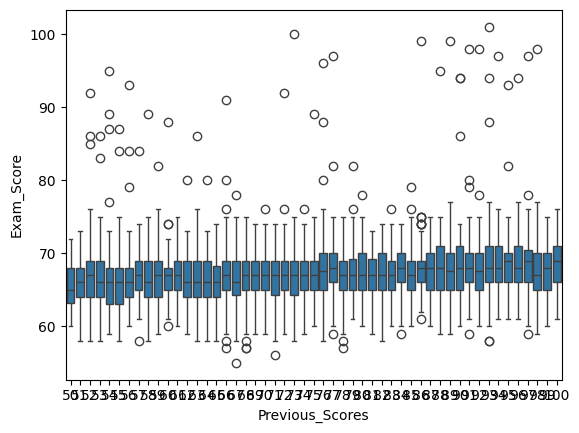

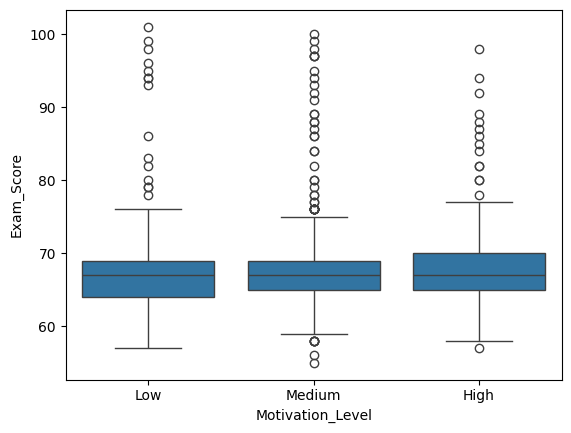

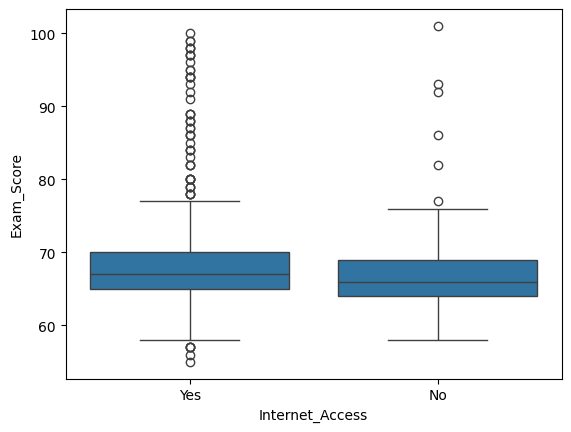

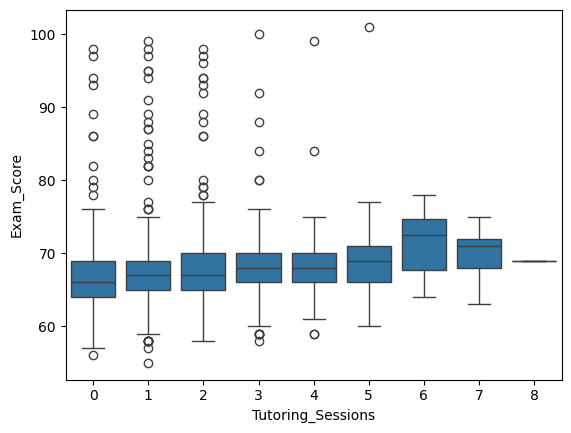

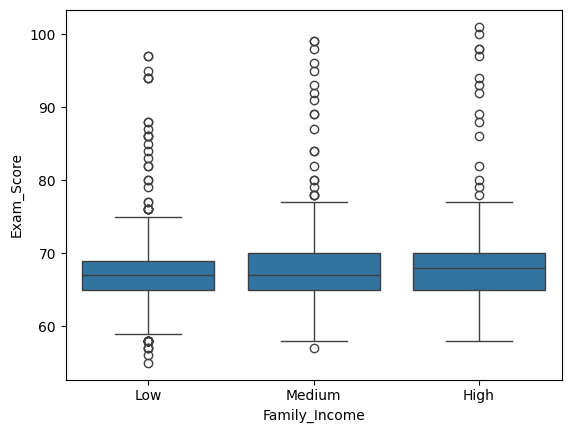

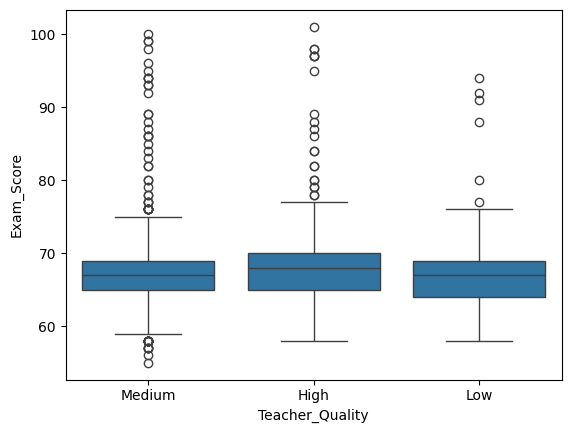

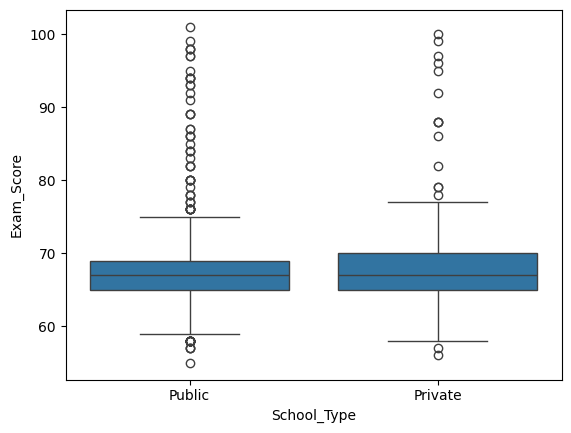

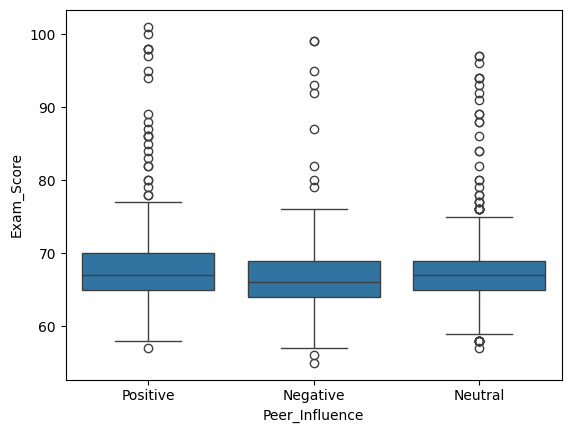

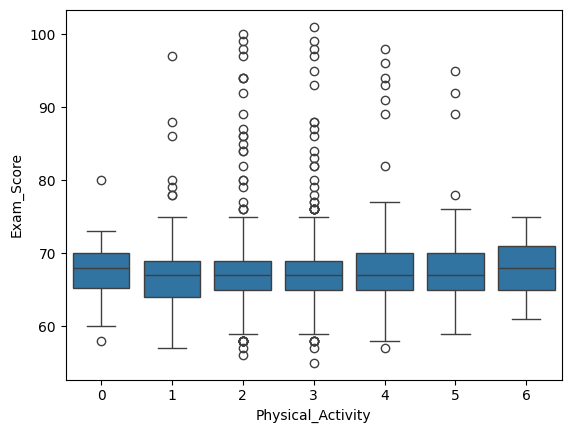

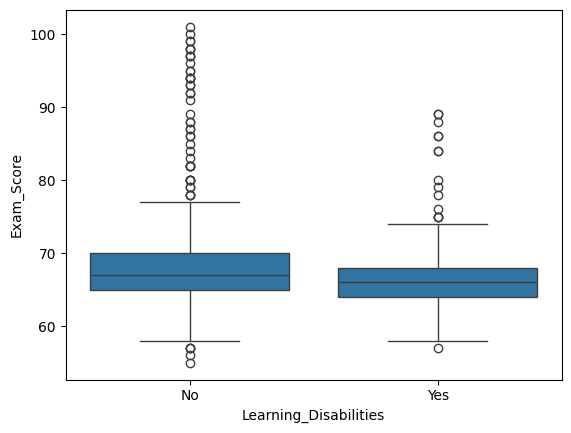

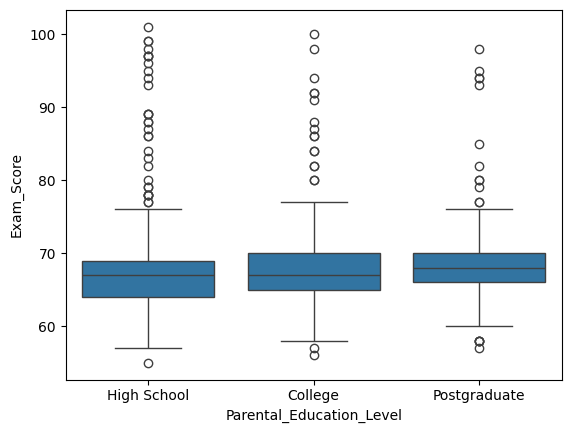

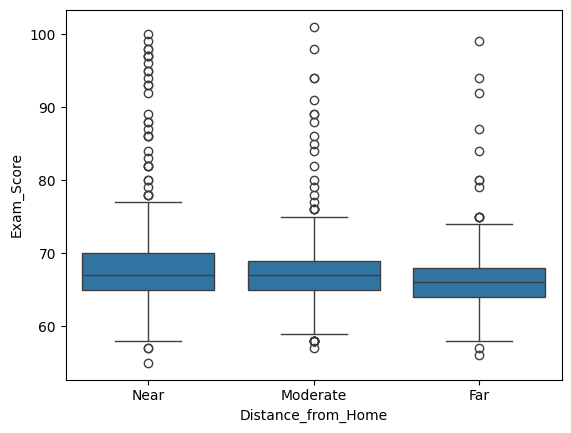

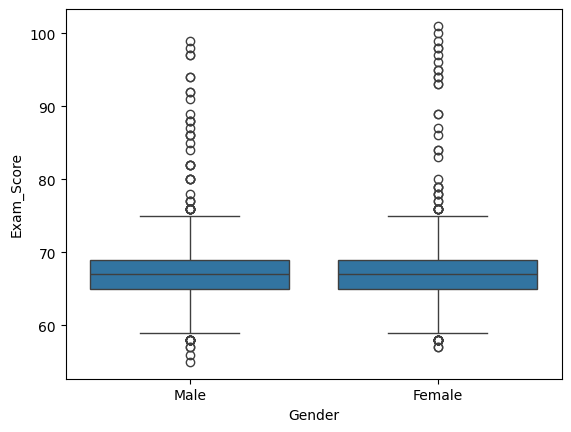

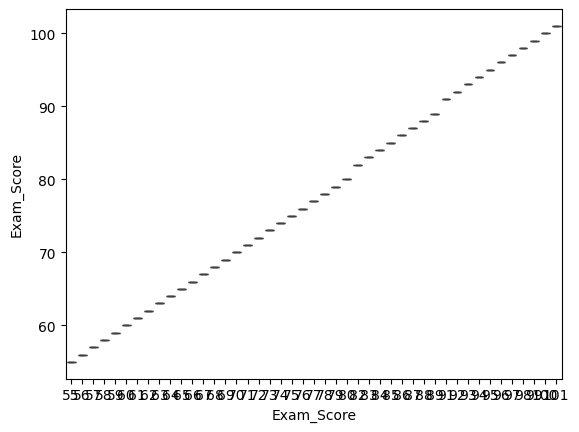

In [74]:
for i in df.columns:
  sns.boxplot(x=i, y='Exam_Score', data=df)
  plt.show()

In [75]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR
"""
df['Exam_Score'] = df['Exam_Score'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)
"""
df = df[(df['Exam_Score'] > lower_bound) & (df['Exam_Score'] <= upper_bound)]


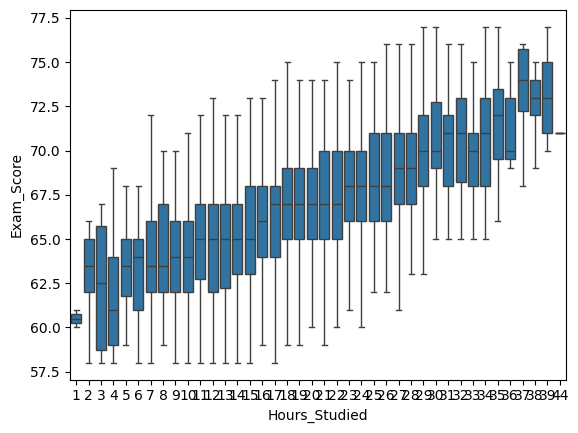

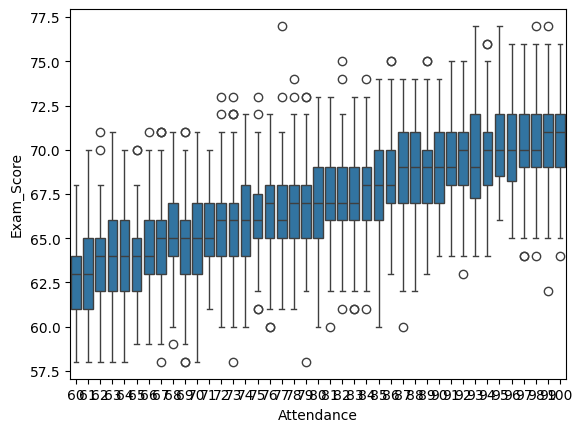

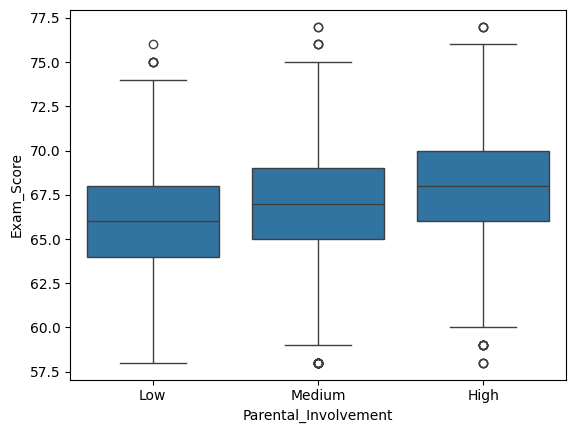

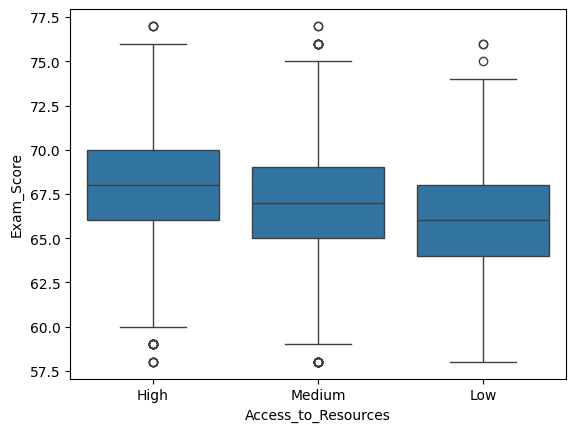

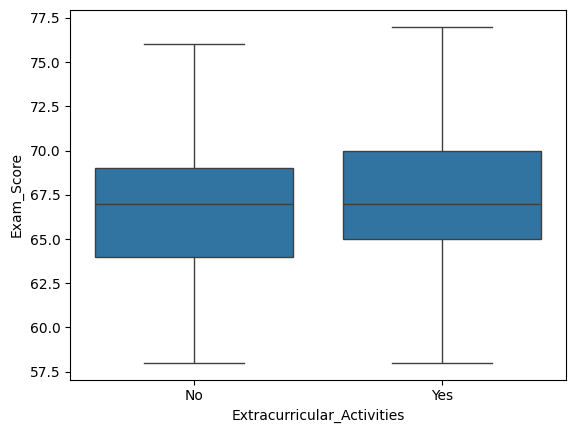

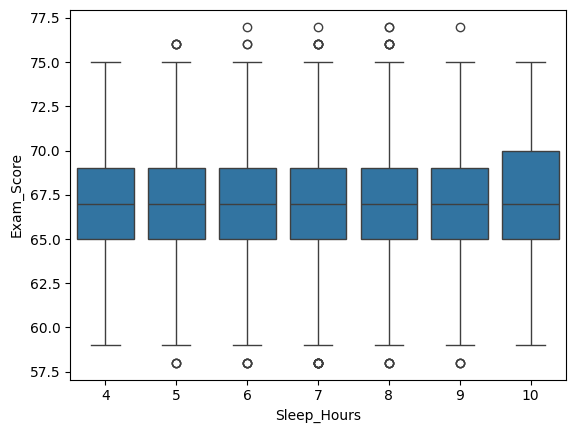

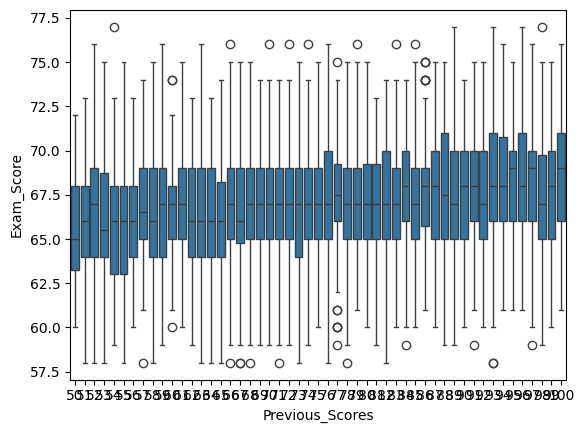

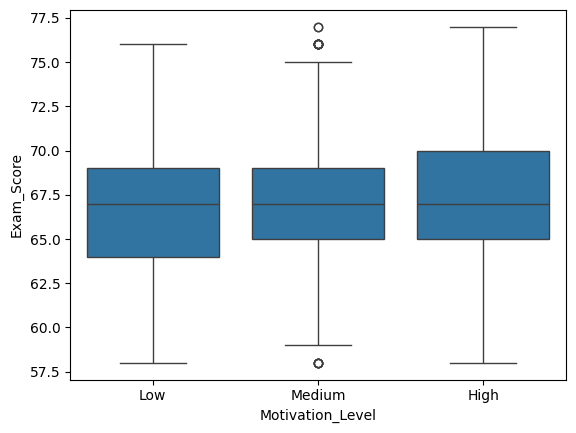

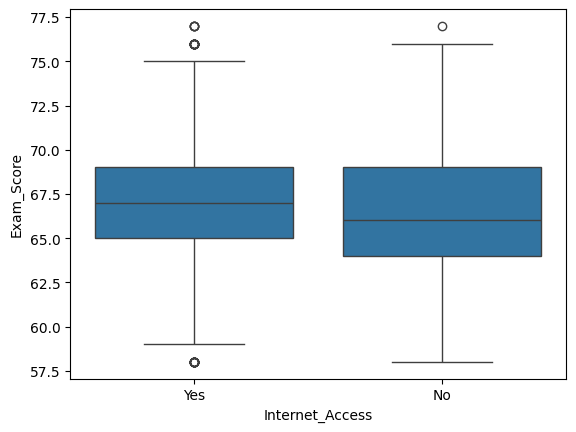

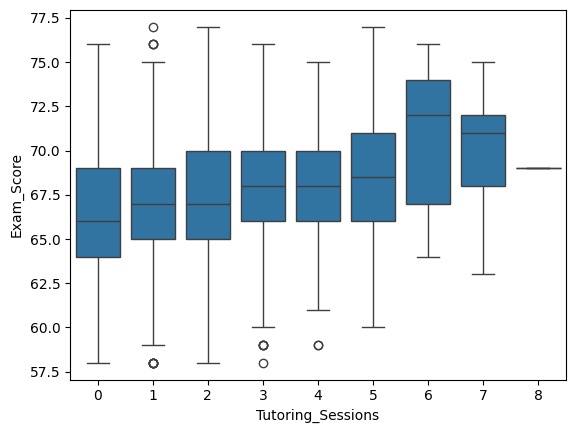

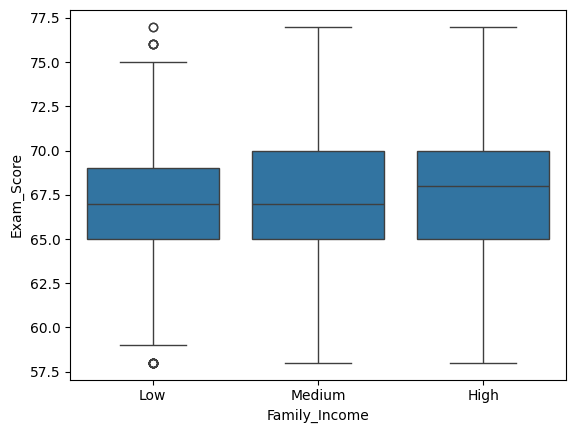

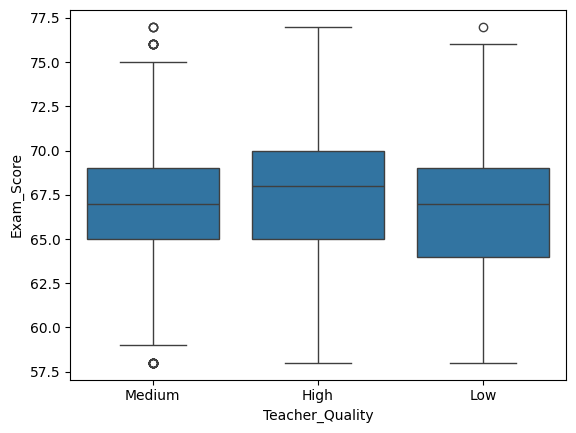

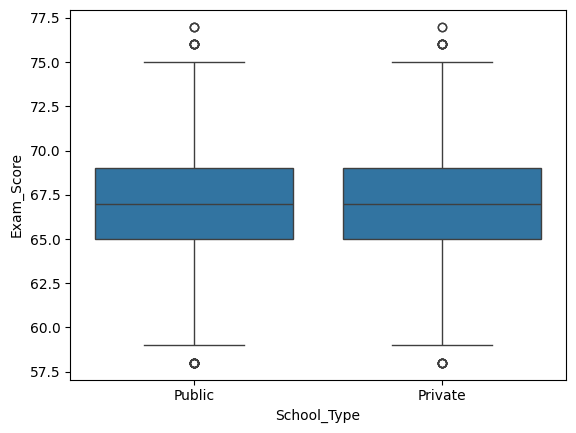

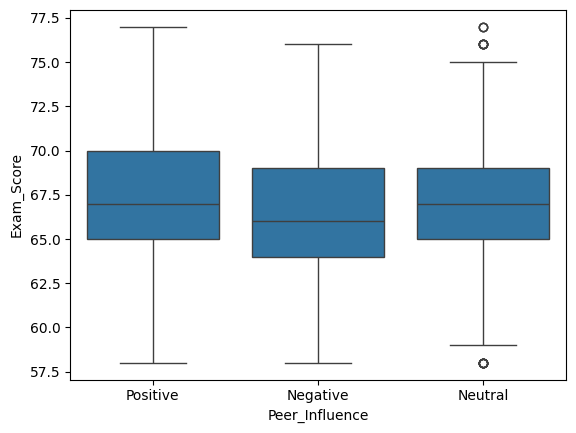

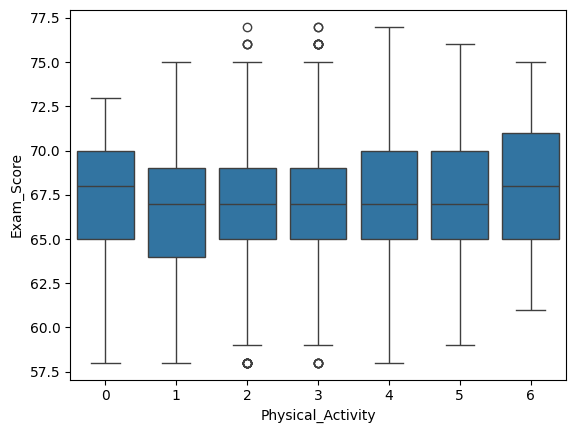

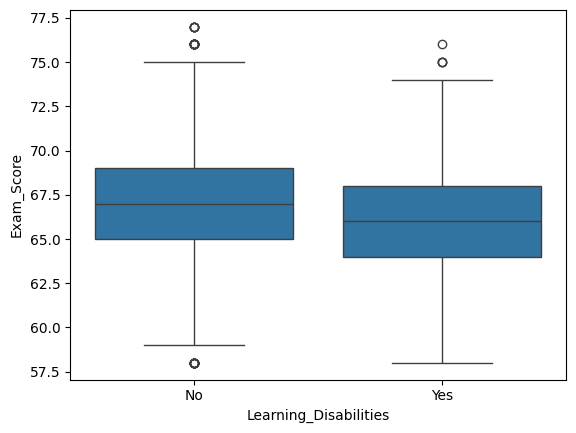

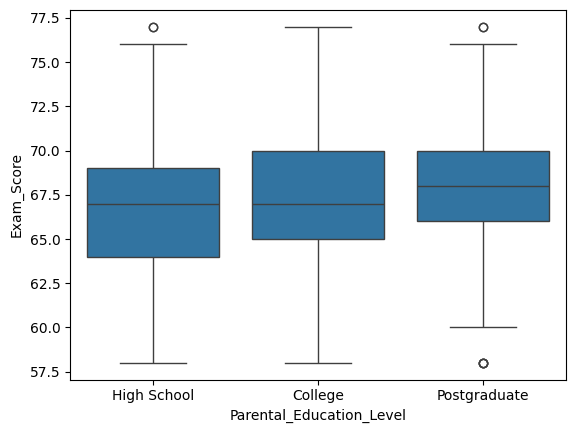

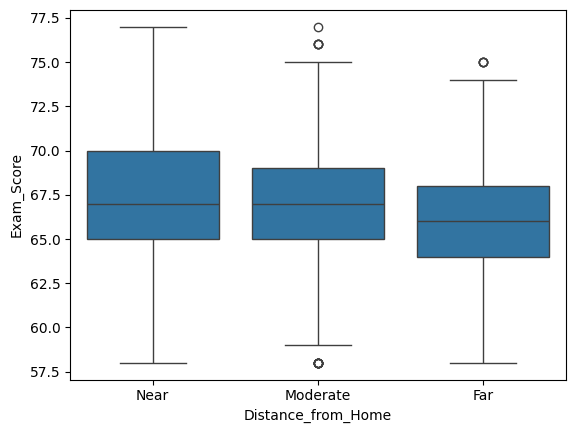

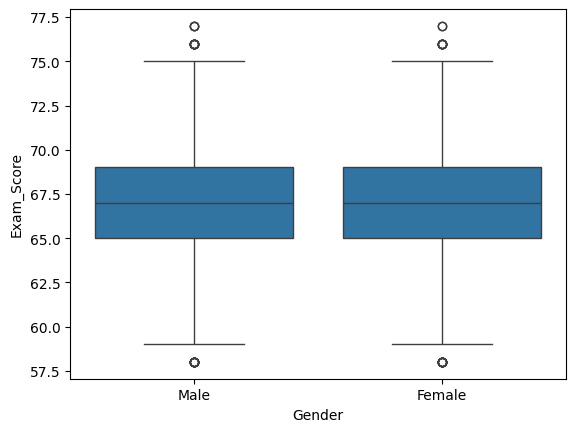

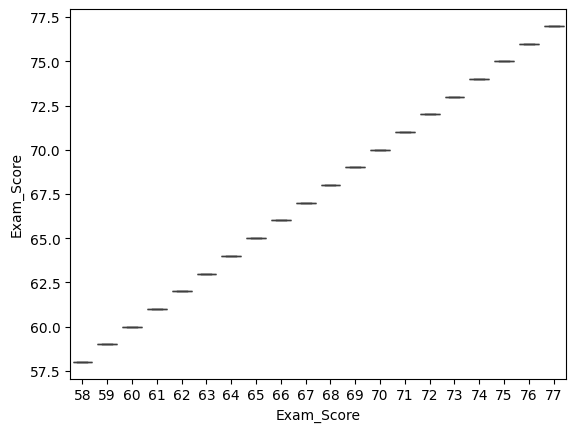

In [76]:
for i in df.columns:
  sns.boxplot(x=i, y='Exam_Score', data=df)
  plt.show()

## 5. Feature Engineering & Selection

In [77]:
 #Label Encode ordered (ordinal) categorical columns
ordinal_cols = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2}
}

for col, mapping in ordinal_cols.items():
    df[col] = df[col].map(mapping)

In [78]:
#One-Hot Encode nominal (unordered) categorical columns
nominal_cols = [
    'Extracurricular_Activities',
    'Internet_Access',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Gender',
    'Distance_from_Home'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [79]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print(correlation_with_target)

Exam_Score                        1.000000
Attendance                        0.677102
Hours_Studied                     0.516124
Previous_Scores                   0.201504
Access_to_Resources               0.188806
Parental_Involvement              0.180196
Tutoring_Sessions                 0.178182
Parental_Education_Level          0.126072
Motivation_Level                  0.099025
Family_Income                     0.097613
Distance_from_Home_Near           0.095415
Peer_Influence_Positive           0.090912
Teacher_Quality                   0.082526
Internet_Access_Yes               0.067087
Extracurricular_Activities_Yes    0.066743
Physical_Activity                 0.045274
Gender_Male                       0.007812
Peer_Influence_Neutral           -0.010685
Sleep_Hours                      -0.012614
School_Type_Public               -0.015237
Distance_from_Home_Moderate      -0.047756
Learning_Disabilities_Yes        -0.107888
Name: Exam_Score, dtype: float64


In [80]:
correlation = df.corr()['Exam_Score'].sort_values(ascending=False)

# Show top 22 correlated features (excluding 'Exam_Score' itself)
top_features = correlation[1:14]
print(top_features)

Attendance                  0.677102
Hours_Studied               0.516124
Previous_Scores             0.201504
Access_to_Resources         0.188806
Parental_Involvement        0.180196
Tutoring_Sessions           0.178182
Parental_Education_Level    0.126072
Motivation_Level            0.099025
Family_Income               0.097613
Distance_from_Home_Near     0.095415
Peer_Influence_Positive     0.090912
Teacher_Quality             0.082526
Internet_Access_Yes         0.067087
Name: Exam_Score, dtype: float64


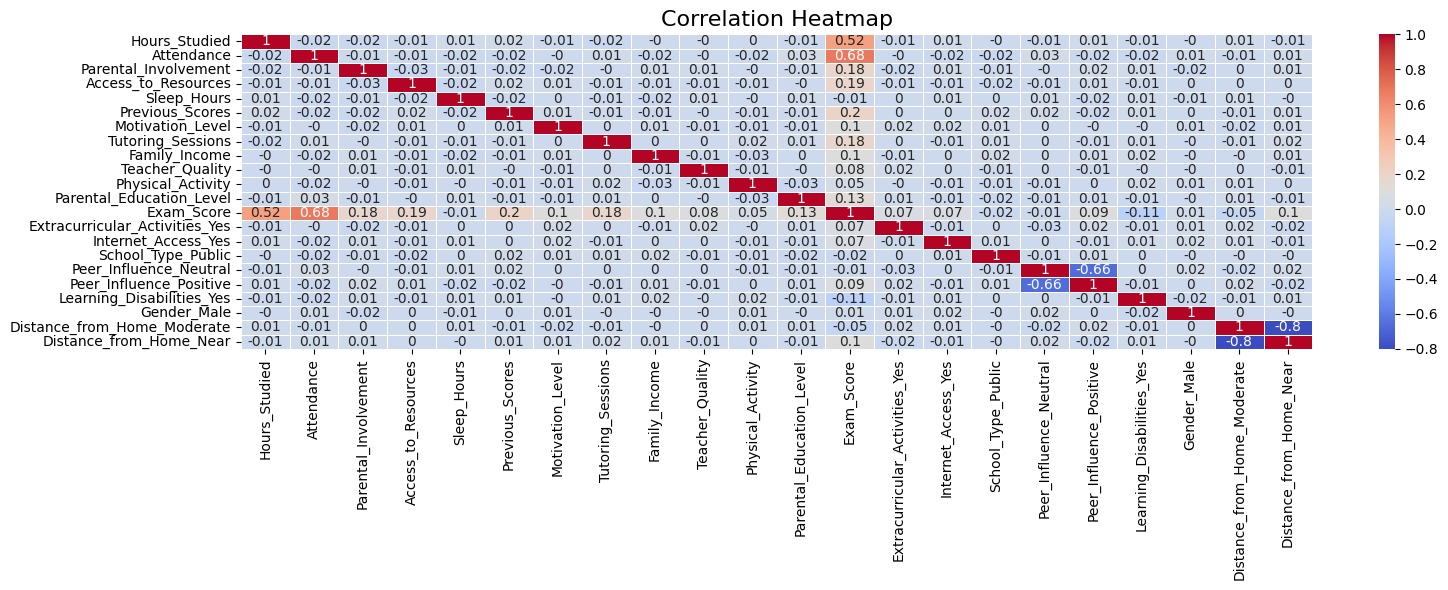

In [81]:
plt.figure(figsize=(16, 6))
sns.heatmap(
    df.corr().round(2),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white'
)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation between features and Class'}>

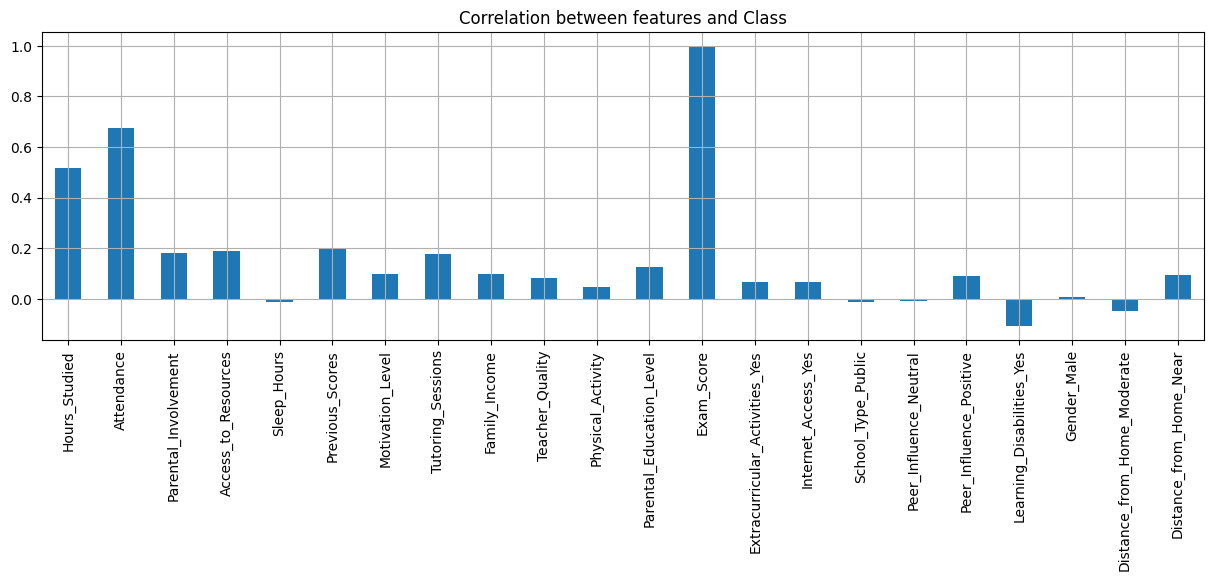

In [82]:
df.corr()['Exam_Score'].plot.bar(figsize=(15, 4), title="Correlation between features and Class", grid=True)

In [83]:
selected_features = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Access_to_Resources',
    'Parental_Involvement',
    'Tutoring_Sessions'
]

## 6. Model Training: Linear Regression


In [84]:


#original imbalanced data
selected_features = top_features.index.tolist()
X = df[selected_features]
y = df['Exam_Score']

# Assuming X and y are already defined from preprocessing steps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Select only numeric continuous columns to scale
cols_to_scale = ['Hours_Studied', 'Attendance', 'Previous_Scores']

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

## 7. Bonus: Polynomial Regression


In [85]:
# Polynomial model (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

## 8. Model Evaluation

In [86]:

# Metrics
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print('Linear Regression RMSE:', rmse_lin)
print('Linear Regression R^2:', r2_lin)
print('Polynomial Regression RMSE:', rmse_poly)
print('Polynomial Regression R^2:', r2_poly)

Linear Regression RMSE: 0.6162084445699996
Linear Regression R^2: 0.9655584275541046
Polynomial Regression RMSE: 0.6191506596137488
Polynomial Regression R^2: 0.9652287454966733


In [87]:

cols_to_scale = ['Hours_Studied', 'Attendance', 'Previous_Scores']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), cols_to_scale)],
    remainder='passthrough'
)

#  Linear Regression
pipeline_lin = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

scores_lin = cross_val_score(pipeline_lin, X, y, cv=kf, scoring='r2')
print("Linear Regression 5-Fold CV R2 scores:", scores_lin)
print("Linear Regression Mean R2:", np.mean(scores_lin))

#  Polynomial Regression degree=2
pipeline_poly = Pipeline([
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

scores_poly = cross_val_score(pipeline_poly, X, y, cv=kf, scoring='r2')
print("Polynomial Regression 5-Fold CV R2 scores:", scores_poly)
print("Polynomial Regression Mean R2:", np.mean(scores_poly))

Linear Regression 5-Fold CV R2 scores: [0.96555843 0.9640551  0.96223262 0.96884114 0.9694853 ]
Linear Regression Mean R2: 0.9660345177121631
Polynomial Regression 5-Fold CV R2 scores: [0.96522875 0.96375663 0.96215879 0.96791585 0.96904249]
Polynomial Regression Mean R2: 0.9656205011878555


## 9. Conclusion


# 📌 **Conclusion**: Linear vs Polynomial Regression

---


After evaluating both models using Root Mean Squared Error (RMSE) and R-squared (R²), the results are summarized as follows:

# Model

---


Linear Regression	- RMSE 0.6162	-  R² 0.9655 ✅

Polynomial Regression - RMSE 0.6191 -	R² 0.9652 ❌

# 🔍 Key Observations:

---


Linear Regression outperforms Polynomial Regression with slightly better RMSE and higher R².

Polynomial Regression did not improve accuracy and introduced unnecessary complexity.

The data is already well modeled by a linear function, especially due to strong features like '**Attendance**' and '**Hours_Studied**'.

# ✅ Final Decision:

---


We will proceed with Linear Regression as the final model.
It offers better generalization, interpretability, and comparable predictive performance with less risk of overfitting.



**📝 Note:**
The slight difference in R² and RMSE values indicates that Polynomial Regression is not worth the extra complexity in this case.

